In [379]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


%matplotlib notebook

## Getting Data in Frames

In [213]:
cols = ['No', 'Player','Team','Apps','Min','G','A','xG','xA','xG90','xA90']


def get_df(txt, columns):
    f = open(txt + ".txt", "r")

    data = f.read()
    f.close()
    
    data = data.replace('\t', ',')
    
    f = open(txt + ".csv", "w")
    f.write(data)
    f.close()
    
    df = pd.read_csv(txt + ".csv", encoding='latin-1', names = columns)
    return df

In [214]:
mou = get_df("mou", cols)
prepsg = get_df("ppsg", cols)
pospsg = get_df("pospsg", cols)

## Cleaning Data

In [215]:
def split_it(val):
    x = re.findall('(^\d+\.\d+)', val)
    return x[0]

def clean(df):
    df['xG'] = df['xG'].apply(split_it)
    df['xA'] = df['xA'].apply(split_it)
    return df

In [216]:
mou = clean(mou)
prepsg = clean(prepsg)
pospsg = clean(pospsg)


pospsg

,No,Player,Team,Apps,Min,G,A,xG,xA,xG90,xA90
0,48,Paul Pogba,Manchester United,9,810,2,0,2.59,1.15,0.29,0.13
1,53,Scott McTominay,Manchester United,5,318,2,0,0.94,0.02,0.27,0.00
2,70,Anthony Martial,Manchester United,7,339,1,0,2.46,0.25,0.65,0.07
3,71,Juan Mata,Manchester United,4,296,1,0,0.59,0.67,0.18,0.20
4,72,Marcus Rashford,Manchester United,8,630,1,0,2.43,1.91,0.35,0.27
5,131,Alexis Sánchez,Manchester United,3,83,0,0,0.00,0.15,0.00,0.17
6,141,Marcos Rojo,Manchester United,2,27,0,0,0.08,0.00,0.27,0.00
7,143,Ander Herrera,Manchester United,3,191,0,0,0.08,0.02,0.04,0.01
8,144,Jesse Lingard,Manchester United,5,380,0,0,0.71,0.89,0.17,0.21
9,151,Romelu Lukaku,Manchester United,6,435,0,0,2.96,0.64,0.61,0.13


In [217]:
pospsg = pospsg.drop(pospsg.index[[6]])
mou = mou.drop(mou.index[[7]])
pospsg

,No,Player,Team,Apps,Min,G,A,xG,xA,xG90,xA90
0,48,Paul Pogba,Manchester United,9,810,2,0,2.59,1.15,0.29,0.13
1,53,Scott McTominay,Manchester United,5,318,2,0,0.94,0.02,0.27,0.00
2,70,Anthony Martial,Manchester United,7,339,1,0,2.46,0.25,0.65,0.07
3,71,Juan Mata,Manchester United,4,296,1,0,0.59,0.67,0.18,0.20
4,72,Marcus Rashford,Manchester United,8,630,1,0,2.43,1.91,0.35,0.27
5,131,Alexis Sánchez,Manchester United,3,83,0,0,0.00,0.15,0.00,0.17
7,143,Ander Herrera,Manchester United,3,191,0,0,0.08,0.02,0.04,0.01
8,144,Jesse Lingard,Manchester United,5,380,0,0,0.71,0.89,0.17,0.21
9,151,Romelu Lukaku,Manchester United,6,435,0,0,2.96,0.64,0.61,0.13


In [218]:
mou.to_csv('mou.csv')
prepsg.to_csv('ppsg.csv')
pospsg.to_csv('pospsg.csv')

## Plotting

In [391]:
mou = pd.read_csv("mou.csv", index_col = 0)
prepsg = pd.read_csv("ppsg.csv", index_col = 0)
pospsg = pd.read_csv("pospsg.csv", index_col = 0)

In [392]:
mou = mou.sort_values(by = 'xG', ascending = True)
prepsg = prepsg.sort_values(by = 'xG', ascending = True)
pospsg = pospsg.sort_values(by = 'xG', ascending = True)

### Mou

<IPython.core.display.Javascript object>


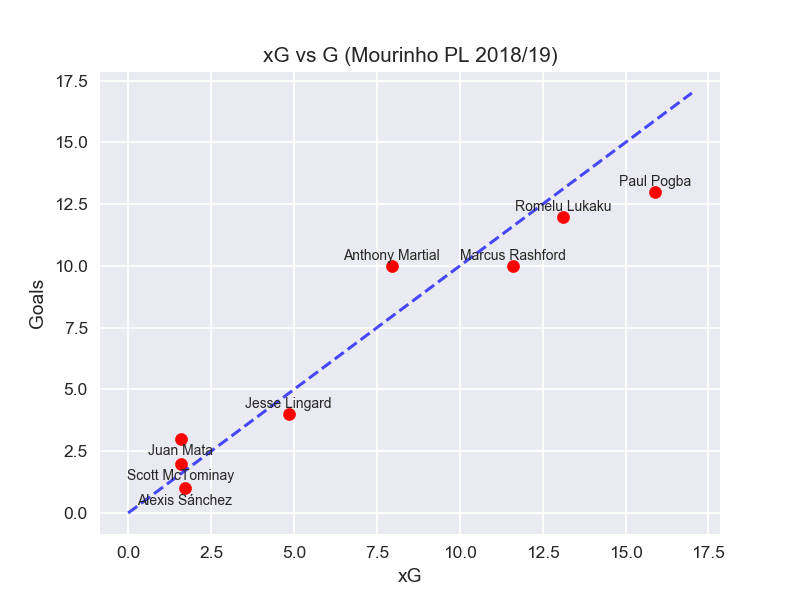

In [508]:
sns.set()

sns.set_palette("Reds_d")
sns.set_style("darkgrid")

fig1 = plt.Figure()

xg = mou['xG'].values
g = mou['G'].values
n = mou['Player'].values

x = list(range(0, 18))
y = x


#plt.scatter(mou['xG'], mou['G'])
plt.plot(x, y, '--b', alpha = 0.7)




for i, txt in enumerate(n):
    if i == 0:
        continue
    else:
        d1 = xg[i] - xg[i-1]
        d2 = g[i] - g[i-1]
        if d1 < 0.2:
            if d1 > 0.01:
                plt.scatter(xg[i], g[i], color = 'red')
                plt.text(xg[i], g[i] - 0.5, txt,{'ha': 'center', 'va': 'center'},  fontsize = 8, rotation = 0)
            continue
        else:
            plt.scatter(xg[i], g[i], color = 'red')
            plt.text(xg[i], g[i] + 0.4, txt,{'ha': 'center', 'va': 'center'},  fontsize = 8, rotation = 0)
   

fig = plt.gcf()
ax = fig.gca()
ax.set_xlabel('xG')
ax.set_ylabel('Goals')
ax.set_title('xG vs G (Mourinho PL 2018/19)')

fig.savefig('mou.jpg', dpi = 300, facecolor = d.get_facecolor())
plt.show()

### Pre PSG

<IPython.core.display.Javascript object>


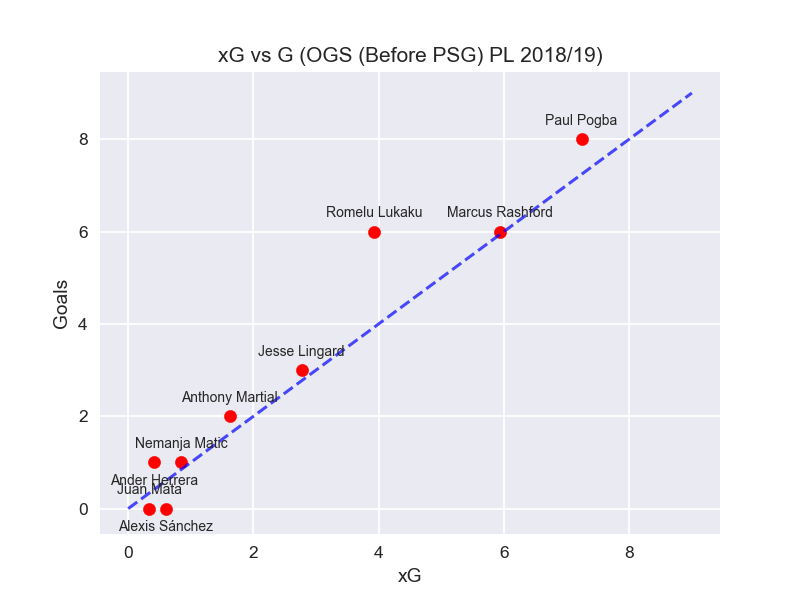

In [509]:
sns.set()

sns.set_palette("Reds_d")
sns.set_style("darkgrid")

fig2 = plt.Figure()

xg = prepsg['xG'].values
g = prepsg['G'].values
n = prepsg['Player'].values

x = list(range(0, 10))
y = x


#plt.scatter(prepsg['xG'], prepsg['G'])
plt.plot(x, y, '--b', alpha = 0.7)




for i, txt in enumerate(n):
    if i == 0:
        continue
    else:
        d1 = xg[i] - xg[i-1]
        d2 = g[i] - g[i-1]
        if d1 < 0.2:
            if d1 > 0.05:
                plt.scatter(xg[i], g[i], color = 'red')
                plt.text(xg[i], g[i] - 0.4, txt,{'ha': 'center', 'va': 'center'},  fontsize = 8, rotation = 0)
            continue
        else:
            plt.scatter(xg[i], g[i], color = 'red')
            plt.text(xg[i], g[i] + 0.4, txt,{'ha': 'center', 'va': 'center'},  fontsize = 8, rotation = 0)
   


#ax.set_title('xG vs G (Mourinho PL 2018/19)')
fig = plt.gcf()
ax = fig.gca()
ax.set_xlabel('xG')
ax.set_ylabel('Goals')
ax.set_title('xG vs G (OGS (Before PSG) PL 2018/19)')
fig.savefig('prepsg.jpg', dpi = 300, facecolor = d.get_facecolor())

### Post PSG

<IPython.core.display.Javascript object>


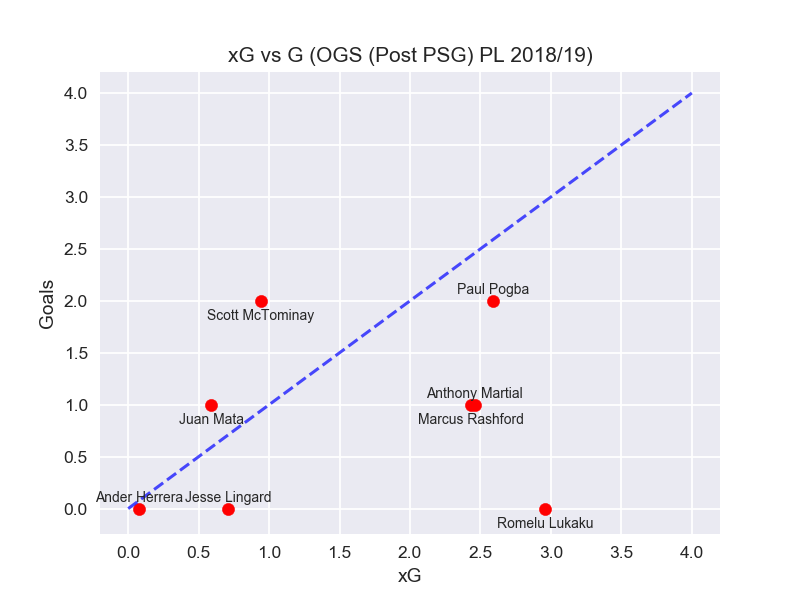

In [510]:
sns.set()

sns.set_palette("Reds_d")
sns.set_style("darkgrid")

fig3 = plt.Figure()

xg = pospsg['xG'].values
g = pospsg['G'].values
n = pospsg['Player'].values

x = list(range(0, 5))
y = x


#plt.scatter(pospsg['xG'], pospsg['G'])
plt.plot(x, y, '--b', alpha = 0.7)




for i, txt in enumerate(n):
    if i == 0:
        continue
    else:
        d1 = xg[i] - xg[i-1]
        d2 = g[i] - g[i-1]
        if d1 < 0.2:
            if d1 >= 0.00:
                plt.scatter(xg[i], g[i], color = 'red')
                plt.text(xg[i], g[i] + 0.1, txt,{'ha': 'center', 'va': 'center'},  fontsize = 8, rotation = 0)
            continue
        else:
            plt.scatter(xg[i], g[i], color = 'red')
            plt.text(xg[i], g[i] - 0.15, txt,{'ha': 'center', 'va': 'center'},  fontsize = 8, rotation = 0)
   


fig = plt.gcf()
ax = fig.gca()
ax.set_xlabel('xG')
ax.set_ylabel('Goals')
ax.set_title('xG vs G (OGS (Post PSG) PL 2018/19)')

fig.savefig('postpsg.jpg', dpi = 300, facecolor = d.get_facecolor())

### Overall xG90

In [413]:
cols = ['Player', 'xG90']
mdf = mou[cols].set_index(['Player'])
prp = prepsg[cols].set_index(['Player'])
pop = pospsg[cols].set_index(['Player'])


df = mdf.join(prp, on = 'Player', how = 'left', rsuffix = '1')
dff = df.join(mdf, on = 'Player', how = 'left', rsuffix = '2')

cols = ['Player', 'G']
mg = mou[cols]
prpg = prepsg[cols]
popsg = pospsg[cols]

mg['G'] = mou['G']/mou['Min'] * 90
prpg['G'] = prepsg['G']/prepsg['Min'] * 90
popsg['G'] = pospsg['G']/pospsg['Min'] * 90

mg = mg.set_index(['Player'])
prpg = prpg.set_index(['Player'])
popsg = popsg.set_index(['Player'])

gf = mg.join(prpg, on = 'Player', how = 'left', rsuffix = '1')
gdf = gf.join(popsg, on = 'Player', how = 'left', rsuffix = '2')

C:\Users\ranja\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\ranja\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\ranja\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [423]:
rn = {
    'xG90':'Mourinho',
    'xG901':'Pre PSG OGS',
    'xG902':'Post PSG OGS',
}

gn = {
    
    'G':'Mourinho',
    'G1':'Pre PSG OGS',
    'G2':'Post PSG OGS',
}
dff.rename(columns = rn, inplace = True)
dff.fillna(0, inplace = True)

gdf.rename(columns = rn, inplace = True)
gdf.fillna(0, inplace = True)

In [482]:
sns.set()
sns.set_palette('Blues_d')

<IPython.core.display.Javascript object>


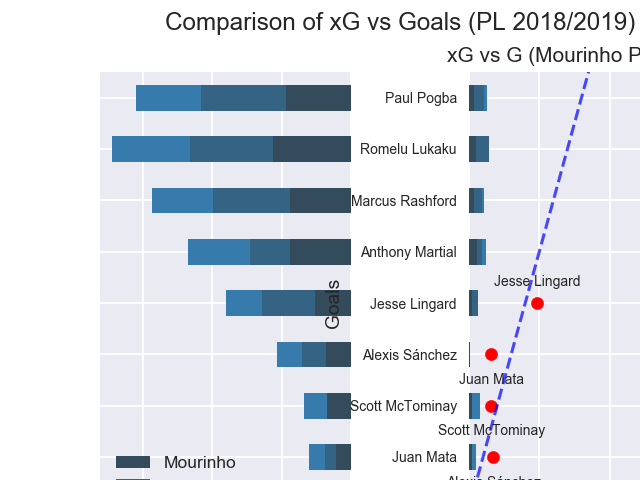

In [498]:
fig, (ax1, ax2) = plt.subplots(1,2)

In [499]:
ax = dff.plot(kind = 'barh', rot=0, fontsize=8,  ax = ax1, stacked = True)
gdf.plot(kind = 'barh', rot=0, fontsize=8,  ax = ax2, stacked = True)

In [500]:
ax1.invert_xaxis()
ax1.set_yticklabels([])

[]

In [501]:
ax1.set_xlabel('xG Per 90 Minutes', fontsize = 9)
ax1.set_ylabel('')
#ax1.legend('')

ax2.legend('')
ax2.set_ylabel('')
ax2.set_xlabel('Goals Per 90 Minutes', fontsize = 9)

plt.subplots_adjust(wspace= 0.47)
ax1.legend(list(rn.values()), loc = 'lower left')

In [505]:
fig.suptitle('Comparison of xG vs Goals (PL 2018/2019)', fontsize= 14)

In [506]:
fig.savefig('comp.jpg', dpi = 300)